In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import *
import h5py


# Function draw cumulative-bar
def draw_Cumulative_bar(DF, Colors, Title, ax):
    """
    Arguments：
    DF: Data frame
    Colors : color list of Carbon Intensity(1: Industry&Direct, 2:Capital)
    Title : figure title
    ax : Area for graphing
    """
    ## set initials
    height = 0.7
    left_data = 0
    font = 24
    adj = 0.05
    edgecolor = Colors #'black'
    linewidth = 2.5
    
    y_label = DF.INDEX
    y = np.arange(len(y_label))
        
    #set edgecolor_list
    edgecolor_MGCG = []
    edgecolor_MGCG.append('black')
    for i in range(len(y)-1):
        edgecolor_MGCG.append(edgecolor[0])
    
    edgecolor_MGCB = []
    edgecolor_MGCB.append('black')
    for i in range(len(y)-1):
        edgecolor_MGCB.append(edgecolor[1])

    edgecolor_MBCG = []
    edgecolor_MBCG.append('black')
    for i in range(len(y)-1):
        edgecolor_MBCG.append(edgecolor[2])
    
    edgecolor_MBCB = []
    edgecolor_MBCB.append('black')
    for i in range(len(y)-1):
        edgecolor_MBCB.append(edgecolor[3])
    
    # MFI data
    x_1 = DF.MGCG[::-1] 
    x_2 = DF.MGCB[::-1] 
    x_3 = DF.MBCG[::-1] 
    x_4 = DF.MBCB[::-1] 
    
    ## set y_limit
    ax.set_ylim(-0.6 ,np.max(y)+0.6)
    
    ## Draw columitive bar 
    # MFI:Good-CF:Good
    MGCG = ax.barh(y, x_1 ,height=height,left=left_data,color=Colors[0],edgecolor=edgecolor_MGCG,linewidth=linewidth)
    left_data += x_1 
    # MFI:Good-CF:Bad
    MGCB = ax.barh(y, x_2 ,height=height,left=left_data,color=Colors[1],edgecolor=edgecolor_MGCB,linewidth=linewidth)
    left_data += x_2 
    # MFI:Bad-CF:Good
    MBCG = ax.barh(y, x_3 ,height=height,left=left_data,color=Colors[2],edgecolor=edgecolor_MBCG,linewidth=linewidth)
    left_data += x_3
    # MFI:Good-CF:Bad
    MBCB = ax.barh(y, x_4 ,height=height,left=left_data,color=Colors[3],edgecolor=edgecolor_MBCB,linewidth=linewidth)
    left_data += x_4

    ##set tittle
    ax.set_title(Title, size=fontsize+6, loc='left')
    
    return [ MGCG, MGCB, MBCG, MBCB]

## Set DataFrame
ExcelFile = '/Users/hata_s/Dropbox/01_Research/02_MF_TimeSeries/03_Matlab/02_Result/R3_Data.xlsx'

DF_RP = pd.read_excel(ExcelFile, sheet_name='RP',skiprows=1).set_index('No')
DF_CUin = pd.read_excel(ExcelFile, sheet_name='CUin',skiprows=1).set_index('No')
DF_CUout = pd.read_excel(ExcelFile, sheet_name='CUout',skiprows=1).set_index('No')
DF_FD = pd.read_excel(ExcelFile, sheet_name='FD',skiprows=1).set_index('No')


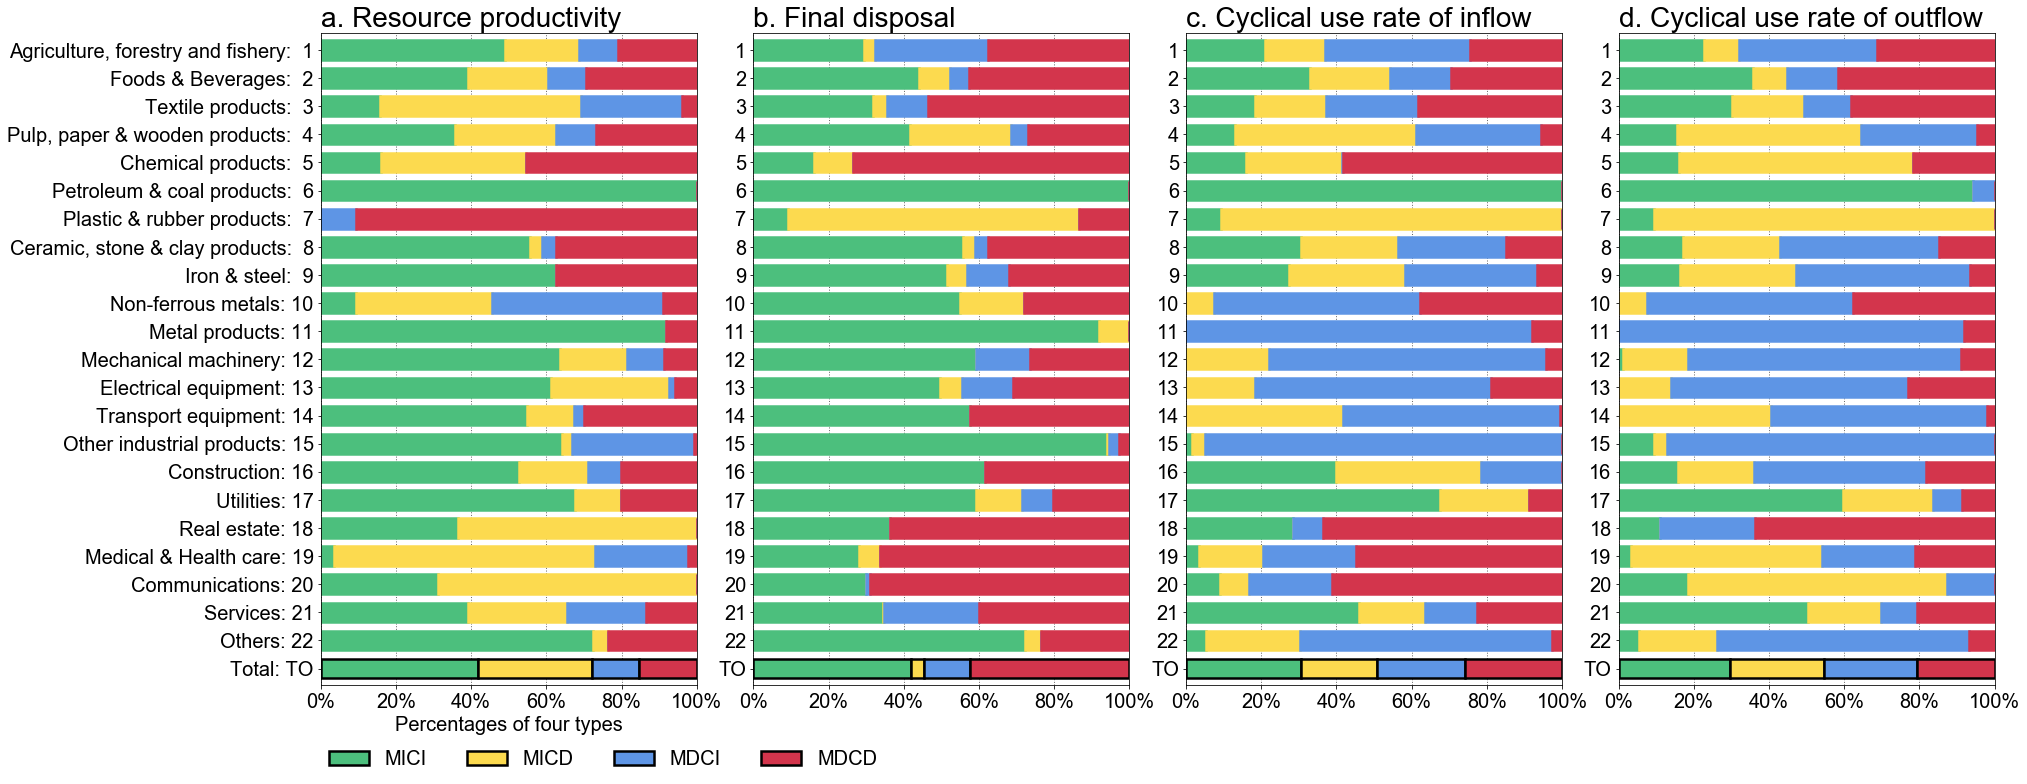

In [3]:
%matplotlib inline
from matplotlib.colors import ListedColormap, BoundaryNorm

plt.rcParams['font.family'] = 'Arial'

# set plot area
fig_high = 12
fig_width = 30
wspace = 0.15

fig,(ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(fig_width,fig_high),
                                    gridspec_kw={"width_ratios":[1,1,1,1]})#各ax、caxの横の長さを比率で設定
plt.subplots_adjust( wspace=wspace, hspace=0) # 間隔指定

axes=[ax0,ax1,ax2,ax3]

# set initials
y_label = []
y_label_2 = []
for i in range(len(DF_RP.INDEX)):
    if DF_RP.index[i] < 10:
        label = F'{DF_RP.INDEX.iloc[i]}:  {DF_RP.index[i]:.0f}'
        y_label.append(label)
        y_label_2.append(F'{DF_RP.index[i]:.0f}')
    elif DF_RP.index[i] == 23:
        label = F'{DF_RP.INDEX.iloc[i]}: TO'
        y_label.append(label)
        y_label_2.append('TO')
    else :
        label = F'{DF_RP.INDEX.iloc[i]}: {DF_RP.index[i]:.0f}'
        y_label.append(label)
        y_label_2.append(F'{DF_RP.index[i]:.0f}')
            
y = np.arange(len(y_label))

fontsize = 22
labelsize = 20
Colors = ['#4cbf7d','#fcda4f','#5e95e5','#d3354c']

## draw bar graph
Bar_RP = draw_Cumulative_bar(DF_RP, Colors, 'a. Resource productivity', ax0)
Bar_FD = draw_Cumulative_bar(DF_FD, Colors, 'b. Final disposal', ax1)
Bar_CUin = draw_Cumulative_bar(DF_CUin, Colors, 'c. Cyclical use rate of inflow', ax2)
Bar_CUout = draw_Cumulative_bar(DF_CUout, Colors, 'd. Cyclical use rate of outflow', ax3)

## set legends
labels = ['MICI', 'MICD', 'MDCI', 'MDCD']
ax0.legend(Bar_RP, labels, fontsize=labelsize, edgecolor='white',loc=(0.0,-0.14),ncol=4)
#ax2.legend(Bar_EEI[::-1], labels[::-1],  fontsize=labelsize, edgecolor='black', loc=(0.38,0.02))

# Adjusting Figure elements
for ax in axes:
    ax.set_yticks(y)
    ax.tick_params(labelsize=labelsize)
    ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
    ax.grid(axis='x',color='dimgrey',lw=1.0,ls=':')
    ax.set_axisbelow(True)

ax0.set_xlabel('Percentages of four types',size=labelsize)
ax0.set_yticklabels(y_label[::-1])
ax1.set_yticklabels(y_label_2[::-1])
ax2.set_yticklabels(y_label_2[::-1])
ax3.set_yticklabels(y_label_2[::-1])

# Save figure
fig.savefig("/Users/hata_s/Dropbox/02_Python/03_MFI_SDA/00_Figfile/MFI_SDA_R3.svg",
             format="svg", bbox_inches="tight", facecolor='none')


In [10]:
print(y_label)

['Agriculture, forestry and fishery:  1', 'Foods & Beverages:  2', 'Textile products:  3', 'Pulp, paper & wooden products:  4', 'Chemical products:  5', 'Petroleum & coal products:  6', 'Plastic & rubber products:  7', 'Ceramic, stone & clay products:  8', 'Iron & steel:  9', 'Non-ferrous metals: 10', 'Metal products: 11', 'Mechanical machinery: 12', 'Electrical equipment: 13', 'Transport equipment: 14', 'Other industrial products: 15', 'Construction: 16', 'Utility: 17', 'Real estate: 18', 'Medical & Health care: 19', 'Communications: 20', 'Services: 21', 'Others: 22']
